In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
cardata = pd.read_csv('/Users/sunilkumar/Downloads/cardata.csv')

In [29]:
cardata.shape

(4340, 8)

In [30]:
cardata.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [31]:
cardata['current_year'] =  2021 
cardata['old_year'] = cardata['current_year'] - cardata['year']

In [32]:
cardata.drop(['year','current_year','seller_type','name'], axis=1,inplace=True)

In [33]:
cardata

,selling_price,km_driven,fuel,transmission,owner,old_year
0,60000,70000,Petrol,Manual,First Owner,14
1,135000,50000,Petrol,Manual,First Owner,14
2,600000,100000,Diesel,Manual,First Owner,9
3,250000,46000,Petrol,Manual,First Owner,4
4,450000,141000,Diesel,Manual,Second Owner,7
...,...,...,...,...,...,...
4335,409999,80000,Diesel,Manual,Second Owner,7
4336,409999,80000,Diesel,Manual,Second Owner,7
4337,110000,83000,Petrol,Manual,Second Owner,12
4338,865000,90000,Diesel,Manual,First Owner,5


In [34]:
print(cardata['fuel'].unique())
print(cardata['transmission'].unique())
print(cardata['owner'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [35]:
from sklearn.preprocessing import LabelEncoder
cardata.iloc[:,2] = LabelEncoder().fit_transform(cardata.iloc[:,2].values)
cardata.iloc[:,3] = LabelEncoder().fit_transform(cardata.iloc[:,3].values)
cardata.iloc[:,4] = LabelEncoder().fit_transform(cardata.iloc[:,4].values)
#df.iloc[:,7] = LabelEncoder().fit_transform(df.iloc[:,7].values)

In [36]:
print(cardata['fuel'].unique())
print(cardata['transmission'].unique())
print(cardata['owner'].unique())

[4 1 0 3 2]
[1 0]
[0 2 1 4 3]


In [37]:
X = cardata.iloc[:,1:6]
Y = cardata.iloc[:,0]

In [38]:
X.shape

(4340, 5)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [40]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [41]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf = [1,2,5,10]


In [42]:
random_grid = {
     'n_estimators':n_estimators,
     'max_features':max_features,
     'max_depth':max_depth,
     'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
}

In [43]:
from sklearn.model_selection import RandomizedSearchCV

    

In [44]:
rf_random = RandomizedSearchCV(estimator=forest, param_distributions=random_grid, scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=2,n_jobs=1)
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   1.8s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   1.7s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   1.8s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   1.8s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   2.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=30, total=   3.0s
[CV] n_estimators=1000, min_samples_

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=5, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=2, scoring='neg_mean_squared_error', verbose=2)

In [45]:
predication = rf_random.predict(X_test)

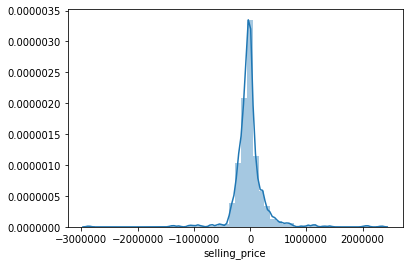

In [46]:
sns.distplot(Y_test-predication)

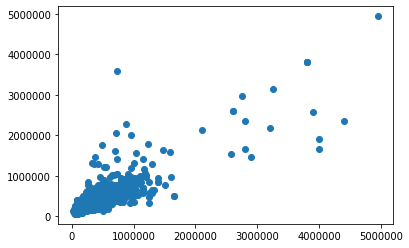

In [47]:
plt.scatter(Y_test,predication)

In [48]:
import pickle

In [49]:
file = open('car_price_predication.pkl','wb')
pickle.dump(rf_random,file)